In [42]:
a = '令诩'
a

'令诩'

In [44]:
type(a), len(a)

(str, 2)

In [45]:
# Create Byte instance of Unicode String (Non-ASCII Character)
b = a.encode('utf-8')
b, type(b), len(b)

(b'\xe4\xbb\xa4\xe8\xaf\xa9', bytes, 6)

In [46]:
b[0], b[1], b[2]

(228, 187, 164)

In [47]:
b[:1], b[1:2], b[2:]

(b'\xe4', b'\xbb', b'\xa4\xe8\xaf\xa9')

In [34]:
uni = u'python'
type(uni)

str

In [24]:
# Create byte instance of ASCII string
asc = 'python'
asc_byte = b'python'

In [26]:
type(asc), type(asc_byte)

(str, bytes)

In [27]:
asc[0], asc_byte[0]

('p', 112)

In [41]:
name = ''
name_en = name.encode('utf-8')
name_de = name_en.decode('big5')
name_de

UnicodeDecodeError: 'big5' codec can't decode byte 0xa4 in position 2: incomplete multibyte sequence

## 进制转换

In [48]:
decimal = 100
binary = 0b11111111
hexi = 0xFFFF

In [49]:
# To DEC
int(binary), int(hexi)

(255, 65535)

In [50]:
# To BIN
bin(decimal), bin(hexi)

('0b1100100', '0b1111111111111111')

In [51]:
# To HEX
hex(decimal), hex(binary)

('0x64', '0xff')

In [54]:
a = '\u8be9'
print(a)

诩


## 进入正题

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Network size
N_input = 4
N_hidden = 3
N_output = 2

np.random.seed(42)
# Make some fake data
X = np.random.randn(4).reshape(4, 1)

weights_input_to_hidden = np.random.normal(0, scale=0.1, size=(N_input, N_hidden))
weights_hidden_to_output = np.random.normal(0, scale=0.1, size=(N_hidden, N_output))

# print X.shape
# print weights_input_to_hidden.shape
# print weights_hidden_to_output.shape

In [24]:
# TODO: Make a forward pass through the network

hidden_layer_in = np.dot(weights_input_to_hidden.T, X)
hidden_layer_out = sigmoid(hidden_layer_in)

print('Hidden-layer Output:')
print(hidden_layer_out)

output_layer_in = np.dot(weights_hidden_to_output.T, hidden_layer_out)
output_layer_out = sigmoid(output_layer_in)

print('Output-layer Output:')
print(output_layer_out)

Hidden-layer Output:
[[ 0.41492192]
 [ 0.42604313]
 [ 0.5002434 ]]
Output-layer Output:
[[ 0.49815196]
 [ 0.48539772]]


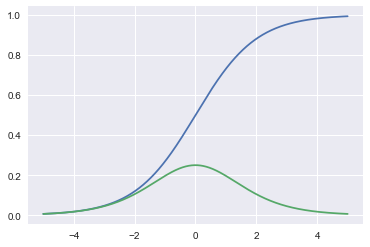

In [32]:
x = np.arange(-5, 5, 0.0001)
y = 1/(1 + np.exp(-x))
y_prime = 1/(1 + np.exp(-x)) - 1/(1 + np.exp(-x))**2
plt.plot(x, y)
plt.plot(x, y_prime)
plt.grid(True)
plt.show()

In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import tensorflow as tf

In [54]:
data = np.random.rand(48) * 5
data = np.ceil(data).astype(int)
data = data.reshape(1, 4, 4, 3)
print("input")
print(data)

w = np.random.rand(12 * 5) * 5
w = np.ceil(w).astype(int)
w = w.reshape(2, 2, 3, 5)
print("kernel")
print(w)

input
[[[[1 2 1]
   [4 2 3]
   [1 3 5]
   [4 2 4]]

  [[1 3 2]
   [3 1 4]
   [3 5 3]
   [5 1 1]]

  [[5 1 5]
   [1 2 3]
   [3 2 5]
   [5 1 3]]

  [[4 3 2]
   [5 5 4]
   [5 4 2]
   [1 2 4]]]]
kernel
[[[[5 4 5 4 1]
   [2 4 1 2 1]
   [1 5 4 5 2]]

  [[5 4 1 5 5]
   [2 4 4 5 1]
   [3 4 4 2 4]]]


 [[[1 5 1 1 4]
   [2 5 4 5 1]
   [3 3 1 3 2]]

  [[2 2 3 4 3]
   [5 4 4 1 5]
   [4 1 2 2 5]]]]


In [34]:
data

array([[[[3, 1, 5],
         [4, 3, 5]],

        [[1, 2, 1],
         [1, 3, 5]]]])

In [49]:
data[0, :, :, :]

array([[[3, 1, 5],
        [4, 3, 5]],

       [[1, 2, 1],
        [1, 3, 5]]])

In [56]:
w[:, :, :, 0]

array([[[5, 2, 1],
        [5, 2, 3]],

       [[1, 2, 3],
        [2, 5, 4]]])

In [69]:
input = tf.placeholder(tf.float32, (None, 4, 4, 3))
filter_weights = tf.placeholder(tf.float32, (2, 2, 3, 5)) # (height, width, input_depth, output_depth)
strides = [1, 2, 2, 1] # (batch, height, width, depth)
padding = 'VALID'
conv = tf.nn.conv2d(input, filter_weights, strides, padding)

with tf.Session() as s:
    res = s.run(conv, feed_dict={input:data, filter_weights:w})
    print(res)
    print(res.shape)

[[[[  83.   93.   71.   92.   84.]
   [  93.  145.  103.  133.  100.]]

  [[ 117.  148.  128.  126.  118.]
   [ 107.  146.  100.  122.  114.]]]]
(1, 2, 2, 5)


In [53]:
with tf.Session() as s:
    print(s.run(tf.reduce_sum(tf.multiply(w[:,:,:,0], data))))


119


In [9]:
# pic = np.array([[4, 5, 10, 22], [9, 3, 14, 3], [2, 5, 7, 9], [11, 3, 5, 0]])
pic = tf.truncated_normal([1, 4, 4, 1], mean=5, stddev=2)
output = tf.nn.max_pool(pic, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

with tf.Session() as s:
    s.run(tf.global_variables_initializer())
    print(pic.eval())
    print(s.run(output))

[[[[ 3.21678114]
   [ 6.24559164]
   [ 5.32314157]
   [ 7.29637003]]

  [[ 1.34117866]
   [ 3.99991059]
   [ 6.04236889]
   [ 6.98537636]]

  [[ 3.37499952]
   [ 3.21826577]
   [ 2.59558773]
   [ 4.48323584]]

  [[ 5.85446501]
   [ 5.8771534 ]
   [ 7.19603539]
   [ 5.25111914]]]]
[[[[ 5.51404667]
   [ 4.92545509]]

  [[ 6.00410557]
   [ 8.06925297]]]]


In [ ]:
import math
i = np.arange(299)
p = 1.0/384
trial = 300
prob = []
for x in i:
    prob.append(math.factorial(x) / math.factorial(x) * math.factorial(trial - x) * p**x * (1 - p)**(trial - x))

import matplotlib.pyplot as plt
plt.plot(x, prob)
plt.show()

# 测试滤波器对图像的影响

## 测试 TensorBoard

In [2]:
import tensorflow as tf
a = tf.constant(2, name="a")
b = tf.constant(3, name="b")
x = tf.add(a, b, name="add")
with tf.Session() as sess:
    writer = tf.summary.FileWriter('./graphs', sess.graph)
    sess.run(x)
writer.close()

## 空间维度的探索

In [3]:
import numpy as np
np.random.randint(10, size=(2,))

array([1, 3])

In [4]:
np.random.randint(10, size=(2, 3))

array([[0, 1, 4],
       [8, 1, 8]])

In [5]:
np.random.randint(10, size=(2, 3, 4))

array([[[3, 4, 5, 7],
        [0, 1, 6, 3],
        [9, 4, 7, 2]],

       [[5, 2, 1, 0],
        [6, 5, 3, 0],
        [8, 8, 9, 3]]])

In [6]:
np.random.randint(10, size=(2, 3, 4, 5))

array([[[[5, 0, 5, 9, 4],
         [9, 6, 3, 1, 7],
         [1, 7, 2, 8, 1],
         [6, 0, 4, 3, 1]],

        [[0, 4, 2, 1, 7],
         [9, 9, 1, 0, 1],
         [8, 6, 5, 6, 7],
         [4, 5, 2, 7, 8]],

        [[5, 5, 4, 6, 9],
         [7, 3, 2, 0, 3],
         [6, 3, 3, 1, 0],
         [9, 9, 9, 5, 2]]],


       [[[2, 4, 9, 9, 5],
         [0, 8, 9, 1, 4],
         [4, 1, 2, 1, 3],
         [1, 6, 5, 8, 2]],

        [[5, 7, 8, 1, 6],
         [9, 8, 0, 0, 9],
         [1, 1, 9, 7, 1],
         [0, 6, 8, 0, 6]],

        [[4, 4, 5, 6, 4],
         [0, 1, 4, 8, 0],
         [3, 5, 3, 0, 2],
         [4, 9, 3, 5, 5]]]])

In [10]:
np.random.randint(10, size=(6, 5, 4, 3, 2))

array([[[[[3, 6],
          [0, 3],
          [9, 6]],

         [[6, 4],
          [9, 2],
          [8, 2]],

         [[1, 9],
          [5, 4],
          [5, 3]],

         [[0, 0],
          [0, 4],
          [1, 4]]],


        [[[5, 0],
          [6, 1],
          [8, 9]],

         [[7, 3],
          [0, 9],
          [0, 3]],

         [[4, 5],
          [2, 4],
          [2, 1]],

         [[7, 5],
          [6, 7],
          [2, 5]]],


        [[[8, 6],
          [6, 7],
          [2, 6]],

         [[7, 0],
          [4, 5],
          [3, 8]],

         [[5, 5],
          [1, 0],
          [4, 9]],

         [[8, 4],
          [3, 3],
          [2, 2]]],


        [[[4, 8],
          [5, 9],
          [3, 8]],

         [[3, 0],
          [9, 0],
          [8, 1]],

         [[4, 7],
          [9, 1],
          [3, 9]],

         [[1, 9],
          [8, 7],
          [5, 1]]],


        [[[0, 8],
          [2, 7],
          [0, 2]],

         [[9, 2],
          [8, 2],
    